In [84]:
import numpy as np
import matplotlib.pyplot as plt

from stacked_mnist import StackedMNISTData, DataMode
from models.auto_encoder import AutoEncoder
from models.mnist_classifier import MNISTClassifier

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

from utils import *

In [85]:
model = AutoEncoder(in_channels=1)
model.load_state_dict(torch.load('trained_models/auto_encoder.pt'))

<All keys matched successfully>

(128, 4, 4)


(array([225., 207., 201., 179., 229., 209., 212., 188., 205., 193.]),
 array([2.06770186e-04, 1.00157439e-01, 2.00108108e-01, 3.00058777e-01,
        4.00009446e-01, 4.99960116e-01, 5.99910785e-01, 6.99861454e-01,
        7.99812123e-01, 8.99762792e-01, 9.99713461e-01]),
 <BarContainer object of 10 artists>)

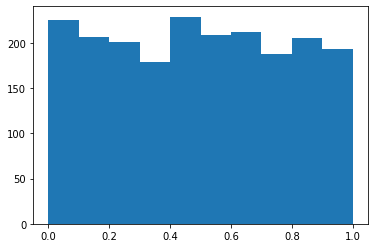

In [86]:
z = np.random.uniform(0, 1, size=(128, 4, 4))
print(z.shape)
plt.hist(z.flatten())

In [87]:
z = torch.from_numpy(z.astype(np.float32))

model.eval()
with torch.no_grad():
    generated_image = model.decoder(z)

In [88]:
generated_image.shape

torch.Size([1, 28, 28])

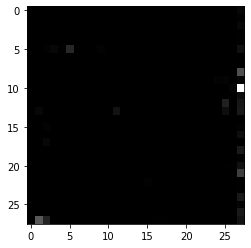

In [89]:
plt.imshow(generated_image.permute(1, 2, 0), cmap="gray")

In [90]:
model

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

In [91]:
c1 = model.decoder[0](z)
c1 = F.relu(c1)

c2 = model.decoder[2](c1)
c2 = F.relu(c2)

c3 = model.decoder[4](c2)

c1.shape, c2.shape, c3.shape


(torch.Size([64, 7, 7]), torch.Size([32, 14, 14]), torch.Size([1, 28, 28]))

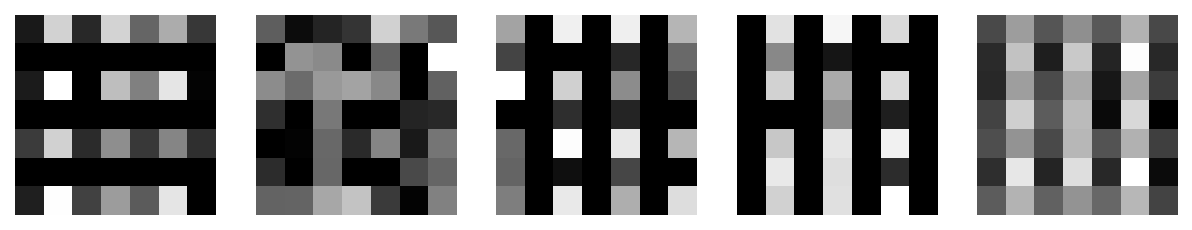

In [92]:
# Visualize som feature maps from c1
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 5, figsize=(10, 6), dpi=150)

    # Plot each image in a separate subplot
    for i in range(5):
        axs[i].imshow(c1[i], cmap='gray')
        axs[i].axis('off')
        
    plt.show()

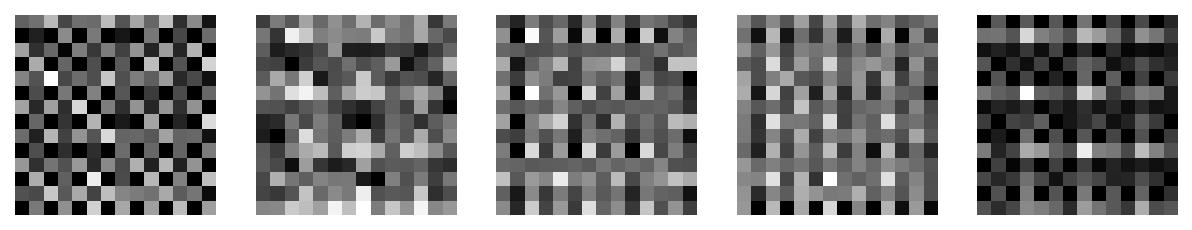

In [93]:
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 5, figsize=(10, 6), dpi=150)

    # Plot each image in a separate subplot
    for i in range(5):
        axs[i].imshow(c2[i], cmap='gray')
        axs[i].axis('off')
        
    plt.show()

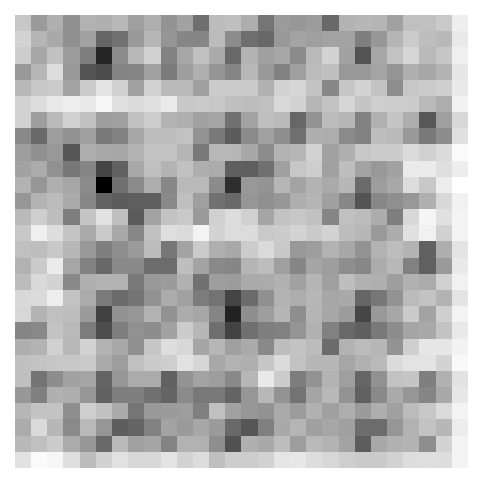

In [94]:
with torch.no_grad():    
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), dpi=150)

    # Plot each image in a separate subplot
    axs.imshow(c3[0], cmap='gray')
    axs.axis('off')
        
    plt.show()
    